# **Australian Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

aus_ds_path = '../../datasets/UCI/Australian/australian.dat'
aus_prep_ds_path = '../../datasets/preprocessed/aus/'

(CVXPY) May 30 05:02:20 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 30 05:02:20 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(aus_prep_ds_path)

In [3]:
data = utilities.read_csv(aus_ds_path, sep=' ', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    int64  
 1   1       690 non-null    float64
 2   2       690 non-null    float64
 3   3       690 non-null    int64  
 4   4       690 non-null    int64  
 5   5       690 non-null    int64  
 6   6       690 non-null    float64
 7   7       690 non-null    int64  
 8   8       690 non-null    int64  
 9   9       690 non-null    int64  
 10  10      690 non-null    int64  
 11  11      690 non-null    int64  
 12  12      690 non-null    int64  
 13  13      690 non-null    int64  
 14  14      690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


#### Fix column names formatting.

In [5]:
data.columns = ['A{}'.format(i) for i in range(1, 16)]

In [6]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


#### Fix column dtypes.

In [8]:
data['A1'] = data['A1'].astype('category')
data['A2'] = data['A2'].astype('float64')
data['A3'] = data['A3'].astype('float64')
data['A4'] = data['A4'].astype('category')
data['A5'] = data['A5'].astype('category')
data['A6'] = data['A6'].astype('category')
data['A7'] = data['A7'].astype('float64')
data['A8'] = data['A8'].astype('category')
data['A9'] = data['A9'].astype('category')
data['A10'] = data['A10'].astype('float64')
data['A11'] = data['A11'].astype('category')
data['A12'] = data['A12'].astype('category')
data['A13'] = data['A13'].astype('float64')
data['A14'] = data['A14'].astype('float64')
data['defaulted'] = data['A15'] == 1

#### Drop original label column.

In [9]:
data.drop(['A15'], axis=1, inplace=True)

#### Plot features data types.

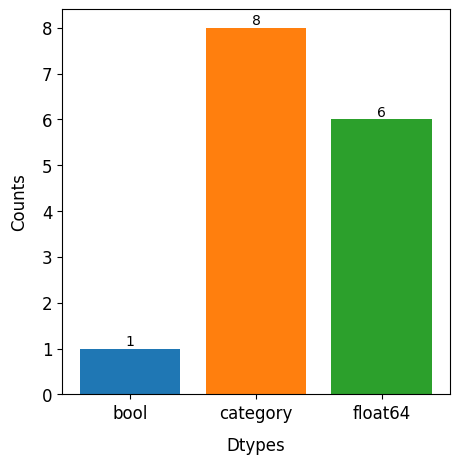

In [10]:
plotting.plot_dtypes_hist(data, save_path=aus_prep_ds_path)

#### Data cleaning.

In [11]:
before_data_cleaning_count = len(data)

#### Plot class distribution.

In [12]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,defaulted
0,1,22.08,11.460,2,4,4,1.585,0,0,0.0,1,2,100.0,1213.0,False
1,0,22.67,7.000,2,8,4,0.165,0,0,0.0,0,2,160.0,1.0,False
2,0,29.58,1.750,1,4,4,1.250,0,0,0.0,1,2,280.0,1.0,False
3,0,21.67,11.500,1,5,3,0.000,1,1,11.0,1,2,0.0,1.0,True
4,1,20.17,8.170,2,6,4,1.960,1,1,14.0,0,2,60.0,159.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0.0,0,2,0.0,1.0,True
686,1,20.67,0.415,2,8,4,0.125,0,0,0.0,0,2,0.0,45.0,False
687,0,18.83,9.540,2,6,4,0.085,1,0,0.0,0,2,100.0,1.0,True
688,0,27.42,14.500,2,14,8,3.085,1,1,1.0,0,2,120.0,12.0,True


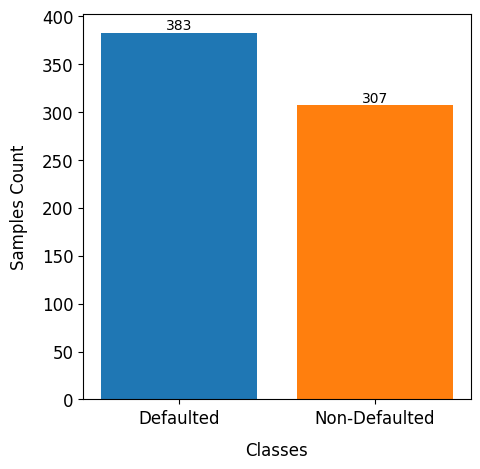

In [13]:
plotting.plot_class_distr_hist(data, save_path=aus_prep_ds_path)

#### Plot missing values histogram.

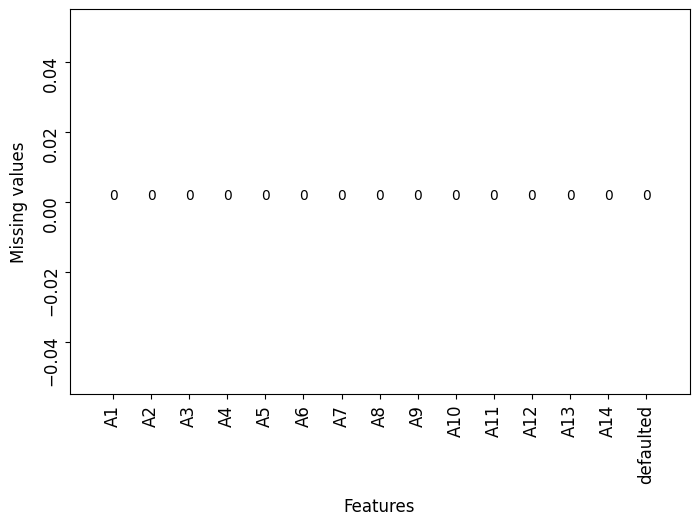

In [14]:
plotting.plot_missing_hist(data, save_path=aus_prep_ds_path)

#### Apply optimal binninf and WoE.

In [15]:
data, features_scores = preprocessing.optbinning_woe(data=data, solver="cp",
                                                     outlier_detector="range",
                                                     save_path=aus_prep_ds_path,
                                                     verbose=True)



Processing feature: A1.
2023-05-30 17:02:21,360 | INFO : Optimal binning started.
2023-05-30 17:02:21,361 | INFO : Options: check parameters.
2023-05-30 17:02:21,362 | INFO : Pre-processing started.
2023-05-30 17:02:21,362 | INFO : Pre-processing: number of samples: 690
2023-05-30 17:02:21,363 | INFO : Pre-processing: number of clean samples: 690
2023-05-30 17:02:21,363 | INFO : Pre-processing: number of missing samples: 0
2023-05-30 17:02:21,364 | INFO : Pre-processing: number of special samples: 0
2023-05-30 17:02:21,364 | INFO : Pre-processing: number of outlier samples: 0
2023-05-30 17:02:21,364 | INFO : Pre-processing: number of others samples: 0
2023-05-30 17:02:21,365 | INFO : Pre-processing: number of categories: 2
2023-05-30 17:02:21,365 | INFO : Pre-processing: number of categories others: 0
2023-05-30 17:02:21,365 | INFO : Pre-processing terminated. Time: 0.0010s
2023-05-30 17:02:21,365 | INFO : Pre-binning started.
2023-05-30 17:02:21,367 | INFO : Pre-binning: number of p

In [16]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,defaulted
0,0.019281,0.091970,-0.680340,-0.209802,0.729789,0.080599,-0.533576,2.366904,0.887577,0.638761,-0.068995,-0.066059,-0.042032,-2.141055,False
1,-0.040517,0.091970,-0.452713,-0.209802,-0.028815,0.080599,0.839589,2.366904,0.887577,0.638761,0.058701,-0.066059,1.200792,-0.022208,False
2,-0.040517,0.091970,0.342574,0.742835,0.729789,0.080599,-0.533576,2.366904,0.887577,0.638761,-0.068995,-0.066059,0.458137,-0.022208,False
3,-0.040517,0.091970,-0.680340,0.742835,0.729789,0.138815,0.839589,-1.526356,-1.109174,-2.610070,-0.068995,-0.066059,-0.757116,-0.022208,True
4,0.019281,0.091970,-0.680340,-0.209802,0.389722,0.080599,-0.733463,-1.526356,-1.109174,-2.610070,0.058701,-0.066059,-0.757116,0.076537,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.019281,0.091970,-0.680340,-0.209802,-1.895164,0.080599,-1.547506,-1.526356,0.887577,0.638761,0.058701,-0.066059,-0.757116,-0.022208,True
686,0.019281,0.091970,0.211613,-0.209802,-0.028815,0.080599,0.839589,2.366904,0.887577,0.638761,0.058701,-0.066059,-0.757116,0.582978,False
687,-0.040517,0.340589,-0.680340,-0.209802,0.389722,0.080599,0.839589,-1.526356,0.887577,0.638761,0.058701,-0.066059,-0.042032,-0.022208,True
688,-0.040517,0.091970,-0.680340,-0.209802,-1.895164,-0.783495,-0.733463,-1.526356,-1.109174,-0.331853,0.058701,-0.066059,0.355065,0.582978,True


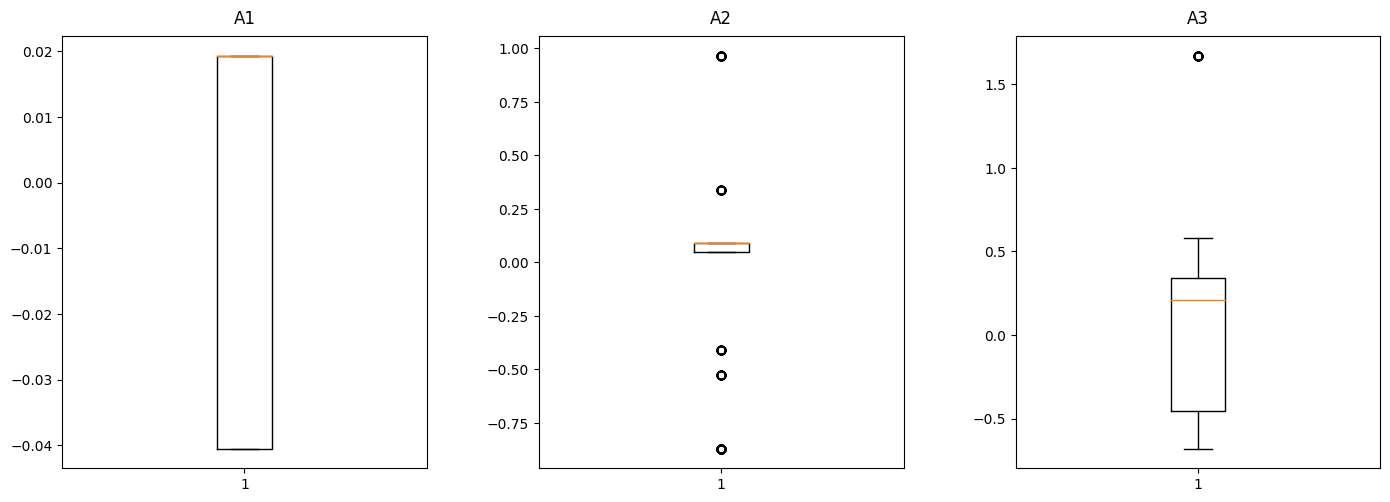

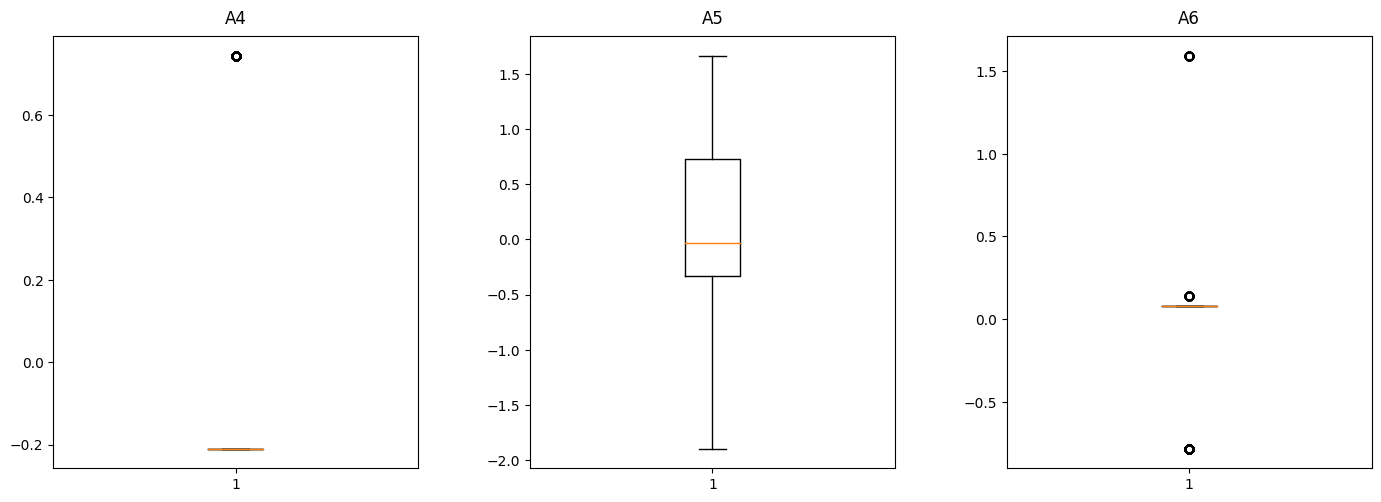

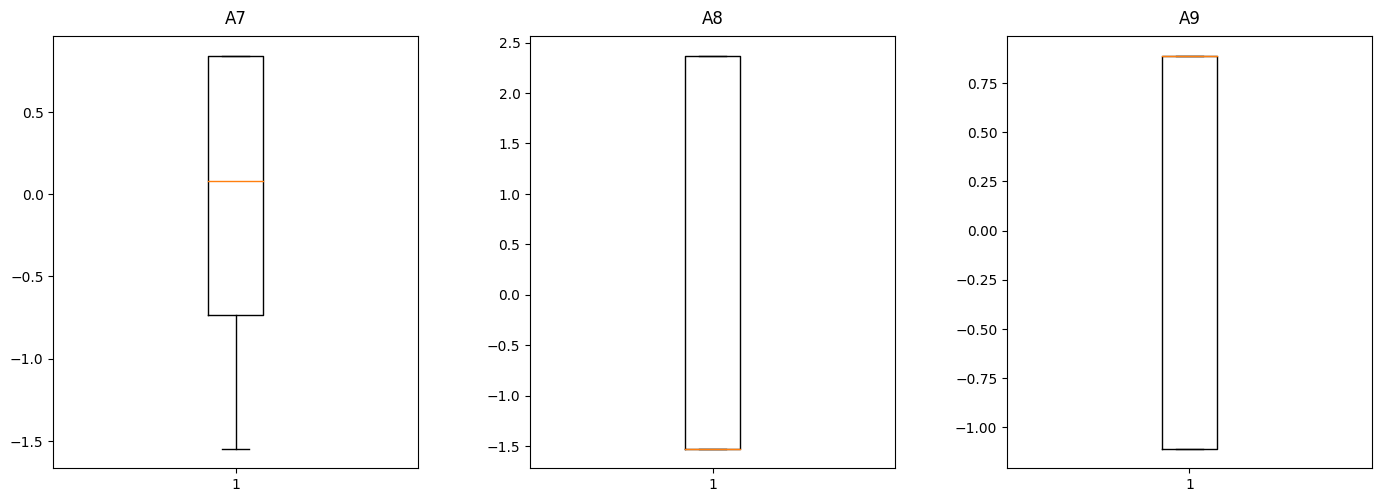

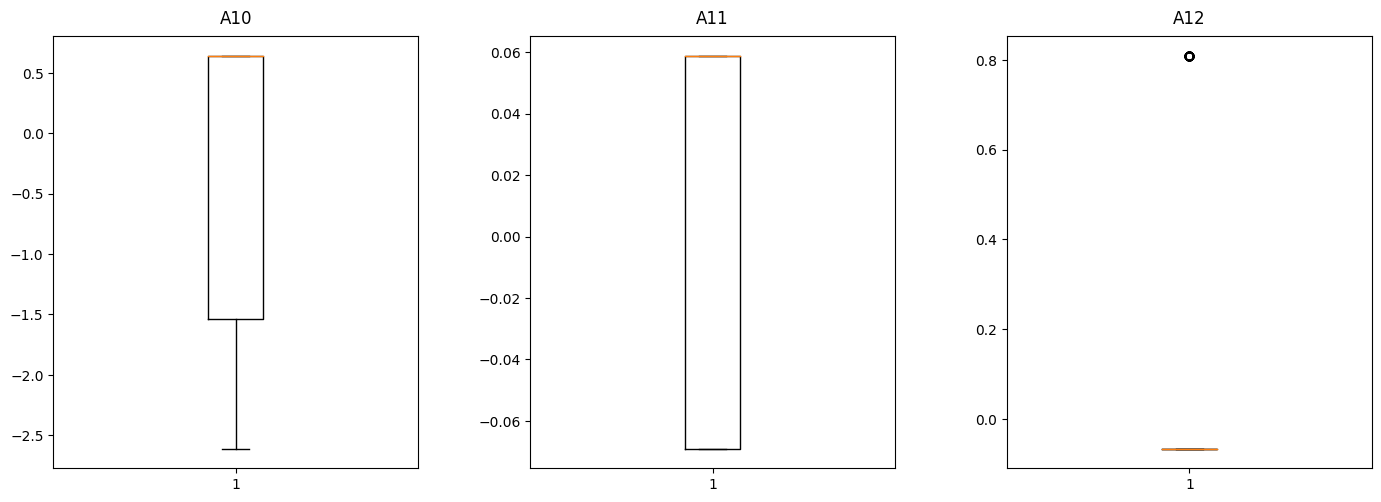

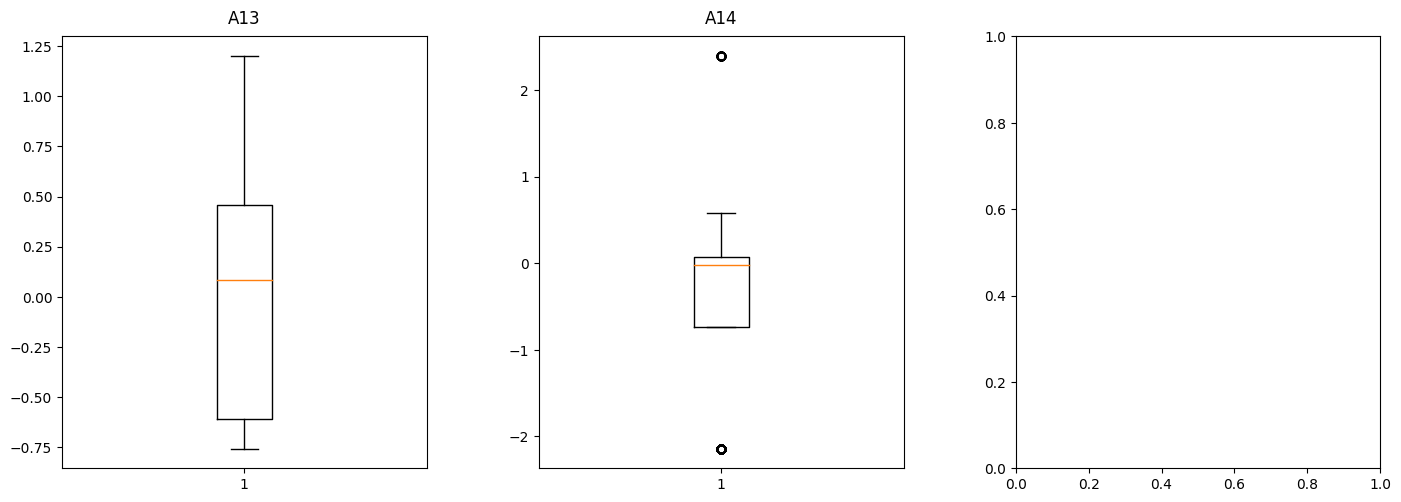

In [17]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=aus_prep_ds_path)

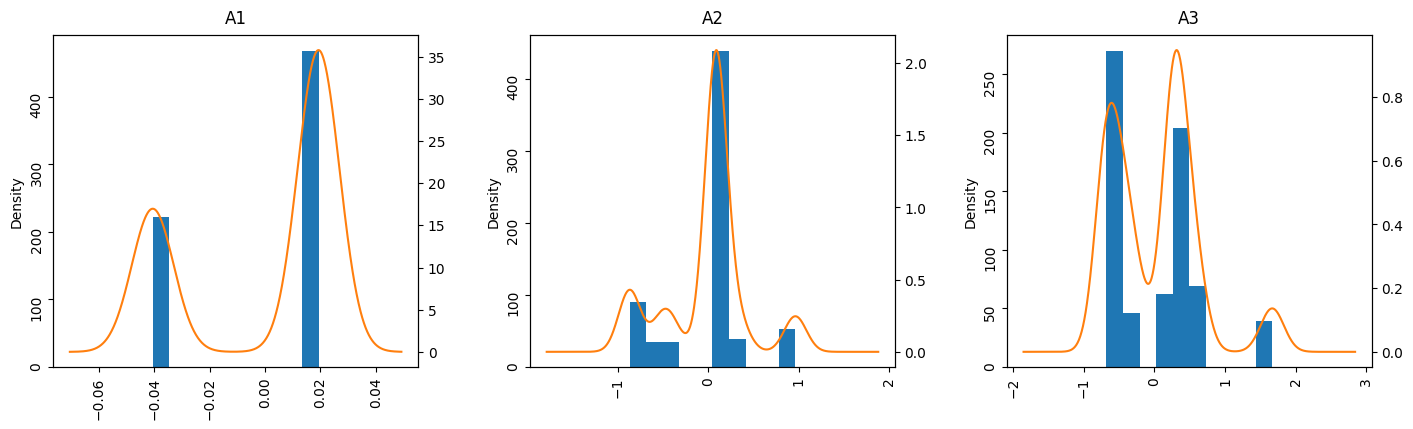

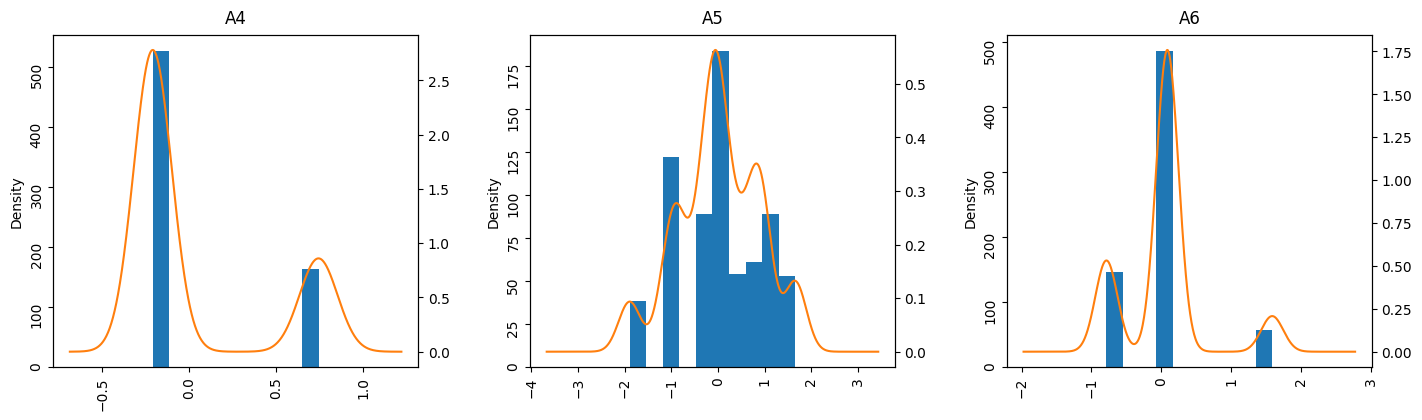

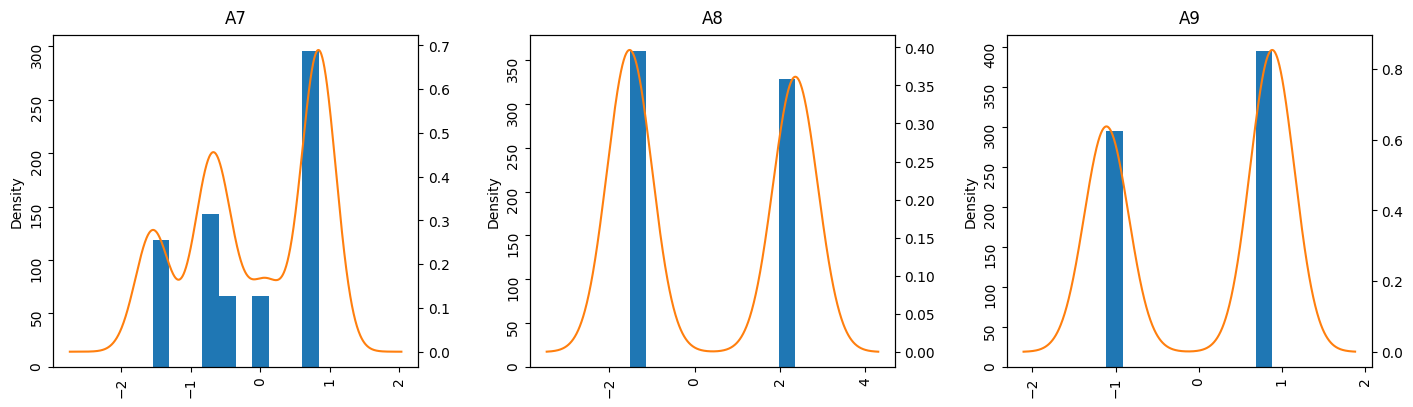

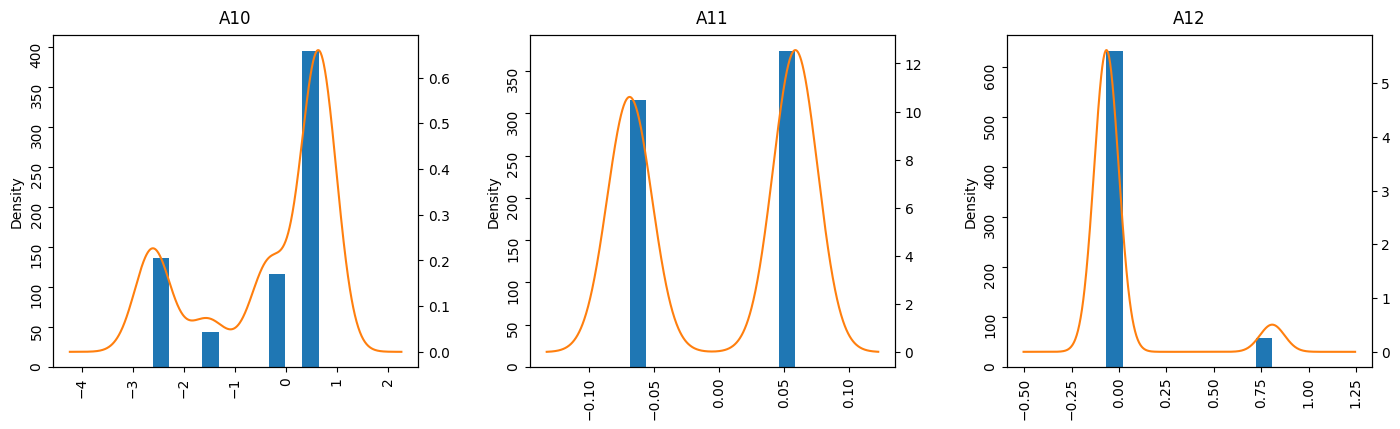

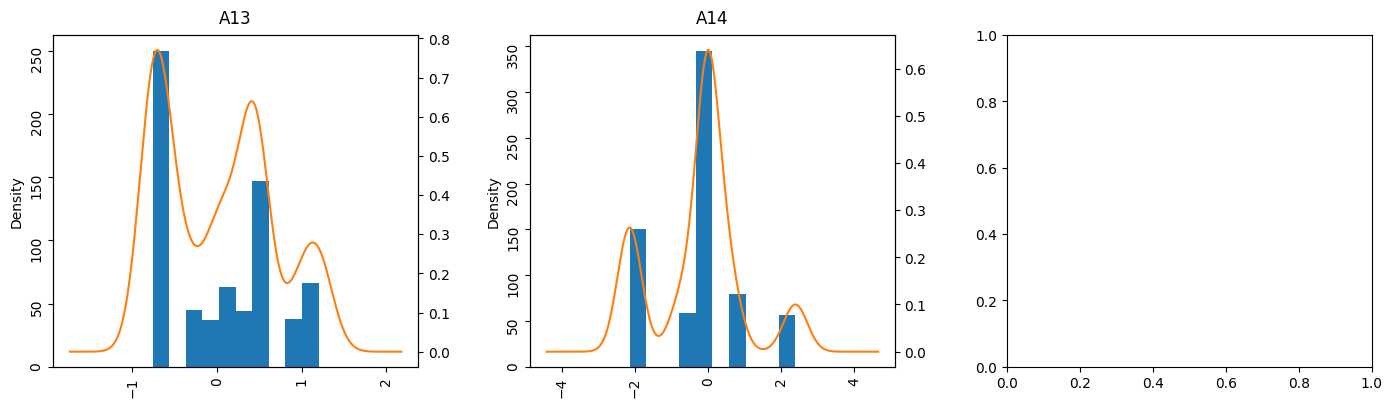

In [18]:
plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=aus_prep_ds_path)

#### Plot samples count before and after Data cleaning.

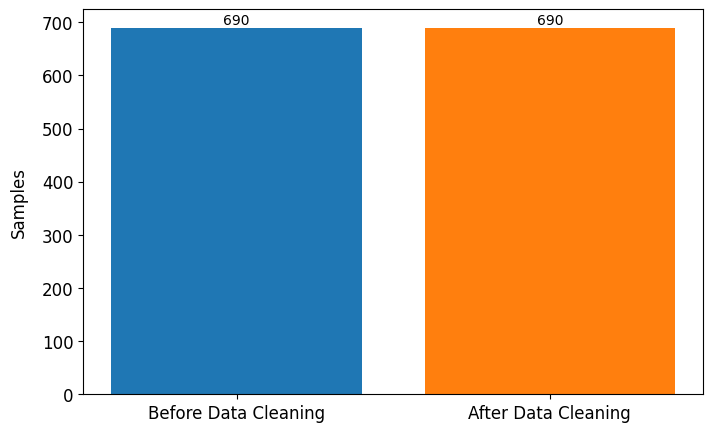

In [19]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=aus_prep_ds_path + 'before-after.pdf')

#### Features IV scores

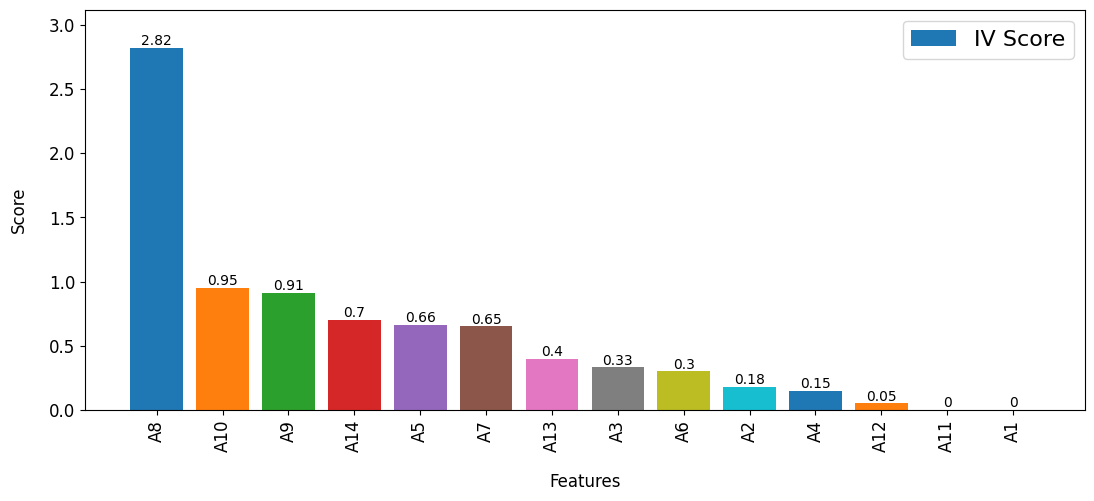

In [20]:
plotting.plot_features_scores(features_scores, '')

#### Features correlation

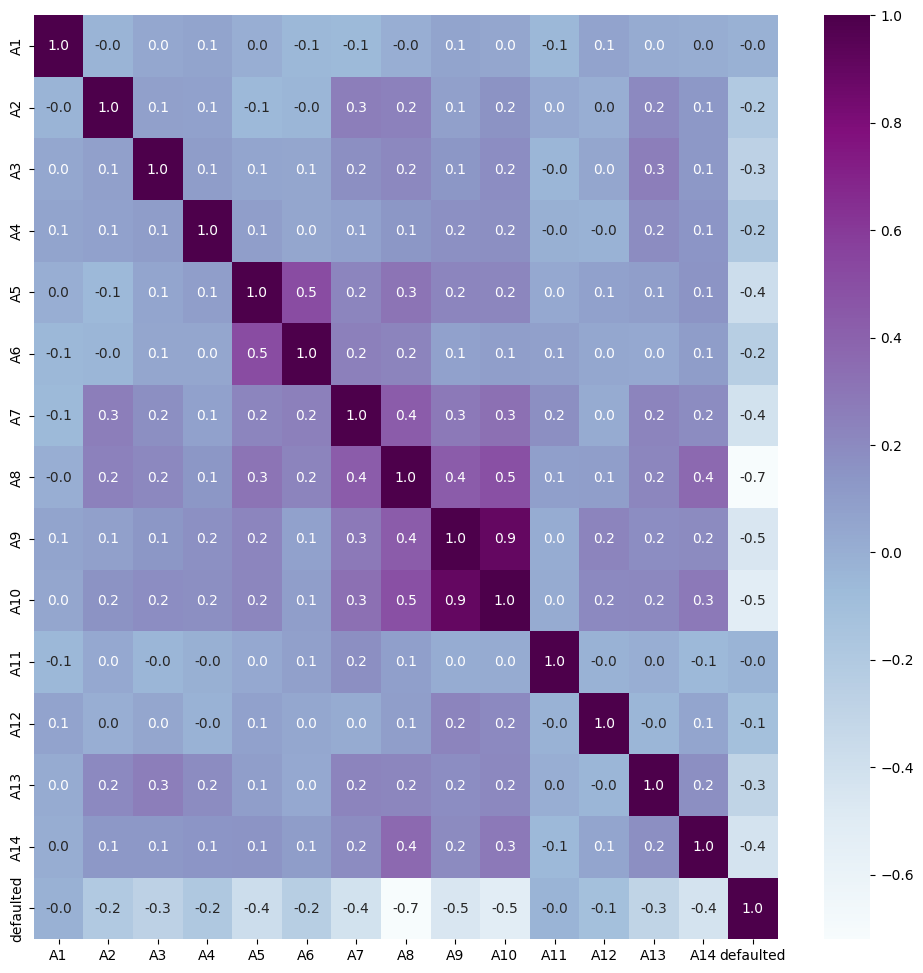

In [21]:
f_corr = preprocessing.features_correlation(data=data)
plotting.plot_heatmap(f_corr, figsize=(12, 12), save_path=aus_prep_ds_path, dpi=100)

#### Drop redundant features based on IV scores.

In [22]:
to_be_dropped = ['A9']
data.drop(to_be_dropped, axis=1, inplace=True)
for key in to_be_dropped:
    del features_scores[key]

#### Save preprocessed dataset.

In [23]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A10,A11,A12,A13,A14,defaulted
0,0.019281,0.091970,-0.680340,-0.209802,0.729789,0.080599,-0.533576,2.366904,0.638761,-0.068995,-0.066059,-0.042032,-2.141055,False
1,-0.040517,0.091970,-0.452713,-0.209802,-0.028815,0.080599,0.839589,2.366904,0.638761,0.058701,-0.066059,1.200792,-0.022208,False
2,-0.040517,0.091970,0.342574,0.742835,0.729789,0.080599,-0.533576,2.366904,0.638761,-0.068995,-0.066059,0.458137,-0.022208,False
3,-0.040517,0.091970,-0.680340,0.742835,0.729789,0.138815,0.839589,-1.526356,-2.610070,-0.068995,-0.066059,-0.757116,-0.022208,True
4,0.019281,0.091970,-0.680340,-0.209802,0.389722,0.080599,-0.733463,-1.526356,-2.610070,0.058701,-0.066059,-0.757116,0.076537,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.019281,0.091970,-0.680340,-0.209802,-1.895164,0.080599,-1.547506,-1.526356,0.638761,0.058701,-0.066059,-0.757116,-0.022208,True
686,0.019281,0.091970,0.211613,-0.209802,-0.028815,0.080599,0.839589,2.366904,0.638761,0.058701,-0.066059,-0.757116,0.582978,False
687,-0.040517,0.340589,-0.680340,-0.209802,0.389722,0.080599,0.839589,-1.526356,0.638761,0.058701,-0.066059,-0.042032,-0.022208,True
688,-0.040517,0.091970,-0.680340,-0.209802,-1.895164,-0.783495,-0.733463,-1.526356,-0.331853,0.058701,-0.066059,0.355065,0.582978,True


In [24]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1         690 non-null    float64
 1   A2         690 non-null    float64
 2   A3         690 non-null    float64
 3   A4         690 non-null    float64
 4   A5         690 non-null    float64
 5   A6         690 non-null    float64
 6   A7         690 non-null    float64
 7   A8         690 non-null    float64
 8   A10        690 non-null    float64
 9   A11        690 non-null    float64
 10  A12        690 non-null    float64
 11  A13        690 non-null    float64
 12  A14        690 non-null    float64
 13  defaulted  690 non-null    bool   
dtypes: bool(1), float64(13)
memory usage: 70.9 KB


**EMP-$p_1$:**

In [25]:
preprocessing.compute_p1(data)

0.4449275362318841

**EMP-$p_0$:**

In [26]:
preprocessing.compute_p0(data)

0.5550724637681159

In [27]:
preprocessing.save_dataset(data=data,
                           features_scores=features_scores,
                           test_size=0.2,
                           save_path=aus_prep_ds_path)

Train split size: 552
Train split p1: 0.44565217391304346
Train split p0: 0.5543478260869565

Test split size: 138
Test split p1: 0.4420289855072464
Test split p0: 0.5579710144927537
